# Constellations statistical analysis

NOtebook based on ITU-R S.1257:


In [1]:
import astropy.constants as const
import astropy.units as u
import pycraf.conversions as conv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#stallite constellation parameters
Re = const.R_earth
h = 550 * u.km #Altitude
i = 53 * u.deg #Inclination
L = np.arange(-89,90,1) * u.deg  # observer latitude
GM = const.GM_earth # Earth Gravitational constant times its mass
sday = (1*u.sday).to(u.s) # sidereal day in seconds
Te = sday # rotation of the earth

In [13]:
Rs = Re + h # orbital radius
vo = (np.sqrt(GM/((Re+h)))).to(u.km/u.s) #mean velocity
Ts = (2*np.pi*(Rs)/vo).to(u.s)  #orbital period of the satellite

# Longitude difference in an orbit due to Earths rotation
Lb = (Ts/Te*2*np.pi*u.rad).to(u.deg)

#Inclination of tracks wrt latitude lines
alpha = (np.arccos(np.cos(i)/np.cos(L))).to(u.deg)

#probability of finding a satellite in a circular area on the sphere
#radius of the circular area
rc = 0.5*u.deg

#lenguth on the rectangle
b = 2*rc/np.sin(alpha)

#probability of a satellite in a band
Ph = b.to(u.rad)/(np.pi*u.rad)/np.cos(L)

C:\Users\f.divruno\Anaconda3\envs\Pycraf\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in arccos
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\f.divruno\Anaconda3\envs\Pycraf\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


7.585108391764706 km / s 5738.947141999026 s
23.977749412910207 deg


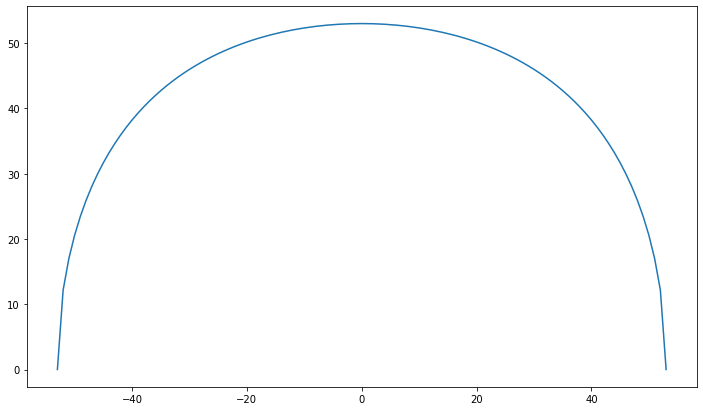

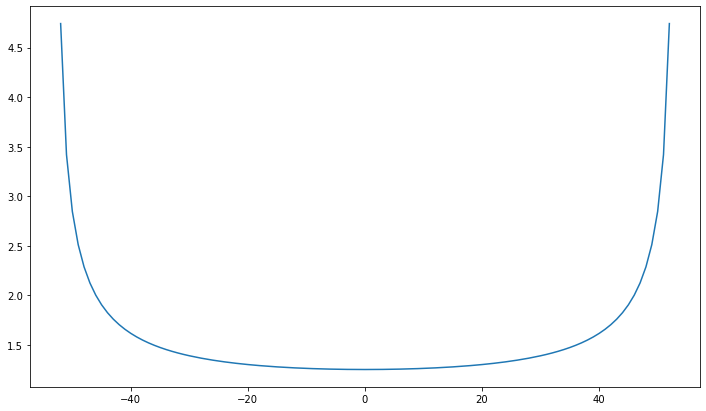

In [14]:
print(vo,Ts)
print(Lb)

plt.figure(figsize = [12,7])
plt.plot(L, alpha)
plt.figure(figsize = [12,7])
plt.plot(L, b)


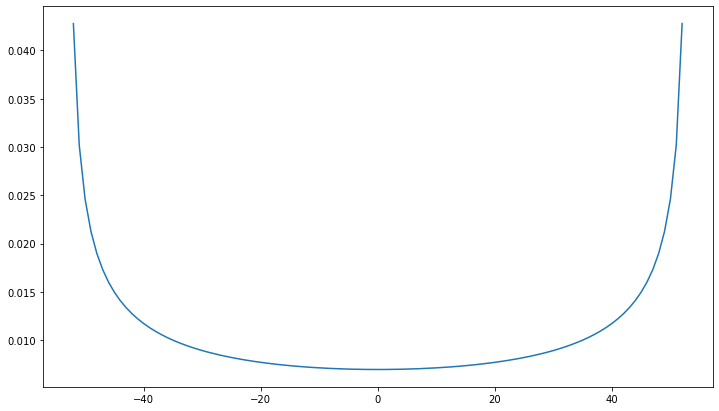

In [15]:
plt.figure(figsize = [12,7])
plt.plot(L, Ph)